In [8]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import stats
import seaborn as sns
from scipy.stats import f_oneway
import math
from sklearn.linear_model import LinearRegression
pd.plotting.register_matplotlib_converters()
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error

In [9]:
import statsmodels.api as sm

In [10]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [12]:
tablo=[]
i=0
while i < 10000:
    url="https://sofifa.com/?showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=wi&showCol%5B3%5D=pf&showCol%5B4%5D=oa&showCol%5B5%5D=pt&showCol%5B6%5D=bo&showCol%5B7%5D=bp&showCol%5B8%5D=gu&showCol%5B9%5D=vl&showCol%5B10%5D=cr&showCol%5B11%5D=fi&showCol%5B12%5D=he&showCol%5B13%5D=sh&showCol%5B14%5D=vo&showCol%5B15%5D=dr&showCol%5B16%5D=cu&showCol%5B17%5D=fr&showCol%5B18%5D=lo&showCol%5B19%5D=bl&showCol%5B20%5D=ac&showCol%5B21%5D=sp&showCol%5B22%5D=ag&showCol%5B23%5D=re&showCol%5B24%5D=ba&showCol%5B25%5D=so&showCol%5B26%5D=ju&showCol%5B27%5D=st&showCol%5B28%5D=sr&showCol%5B29%5D=ln&showCol%5B30%5D=ar&showCol%5B31%5D=in&showCol%5B32%5D=po&showCol%5B33%5D=vi&showCol%5B34%5D=pe&showCol%5B35%5D=cm&showCol%5B36%5D=ma&showCol%5B37%5D=sa&showCol%5B38%5D=sl&showCol%5B39%5D=tg&showCol%5B40%5D=gd&showCol%5B41%5D=gh&showCol%5B42%5D=gc&showCol%5B43%5D=gp&showCol%5B44%5D=gr&showCol%5B45%5D=ir&showCol%5B46%5D=pac&showCol%5B47%5D=sho&showCol%5B48%5D=pas&showCol%5B49%5D=dri&showCol%5B50%5D=def&showCol%5B51%5D=phy&showCol%5B52%5D=ta&showCol%5B53%5D=ts&showCol%5B54%5D=to&showCol%5B55%5D=tp&showCol%5B56%5D=te&showCol%5B57%5D=td&showCol%5B58%5D=tt&showCol%5B59%5D=bs&r=220069&set=true&offset="+str(i)  
    istek=requests.get(url)
    html=istek.text
    soup=BeautifulSoup(html,"lxml")
    #lxml hafif ve hızlı bir kütüphane olduğu için kullanıldı.
    rows=soup.find_all('tr')
    #html inceleyince "tr"-"satır" ile "td"-"sütun" arasındaydı veriler
    
    for tr in rows:
        td = tr.find_all('td')
        td_str=str(td)
        clean_td = (re.sub(re.compile('<.*?>'),'',td_str))
        #Düzenli ifadeler (Regular Expressions) kütüphanesi ile,
        #verinin önündeki html kodları kaldırılmıştır.
        # '.*?' ifadesi ile aradaki(<...>) tüm değerler silindi.
        tablo.append(clean_td)
        result = pd.DataFrame(tablo)
    i+=60
    #her sayfada 60 oyuncu bulunmaktadır.

result

,0
0,[]
1,"[\n, \nR. Lewandowski ST, 32, 92, 92, \n\n\n\n..."
2,"[\n, \nL. Messi RW ST CF, 34, 92, 92, \n\n\n\n..."
3,"[\n, \nK. Mbappé ST LW, 22, 91, 95, \n\n\n\nPa..."
4,"[\n, \nM. Salah RW, 29, 91, 91, \n\n\n\nLiverp..."
...,...
10182,"[\n, \nJ. Wießmeier RWB RM RB, 28, 65, 65, \n\..."
10183,"[\n, \nD. Chima Chukwu ST, 30, 65, 65, \n\n\n\..."
10184,"[\n, \nN. Madsen CDM CM, 21, 65, 75, \n\n\n\nS..."
10185,"[\n, \nL. Montsma CB, 23, 65, 73, \n\n\n\nLinc..."


In [13]:
i=0
for i in range(0,10187):
    result[0][i]=result[0][i].replace("\n","")
i+=1

In [14]:
result.drop_duplicates(subset=None, keep="first", inplace=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

for i in range(0,1):
    result = [result[0][i].split(",") for result[0][i] in result[0]]
    i+=1
    
result=pd.DataFrame(result)
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,[,R. Lewandowski ST,32,92,92,FC Bayern München2014 ~ 2023,185cm,81kg,Right,92,ST,0,€119.5M,430,71,95,90,85,89,407,85,79,85,70,88,407,77,78,77,93,82,424,90,85,76,86,87,396,81,49,95,81,90,88,96,35,42,19,51,15,6,12,8,10,2211,461,5,78,92,79,86,44,82],None,None
2,[,L. Messi RW ST CF,34,92,92,Paris Saint Germain2021 ~ 2023,169cm,67kg,Left,93,CAM,0,€69.5M,425,85,91,70,91,88,467,96,93,93,91,94,447,90,78,91,93,95,387,86,68,71,69,93,347,44,40,93,95,75,96,79,20,35,24,54,6,11,15,14,8,2206,457,5,83,90,91,95,34,64],None,None
3,[,K. Mbappé ST LW,22,91,95,Paris Saint Germain2018 ~ 2025,182cm,73kg,Right,92,ST,4,€194M,411,78,93,72,85,83,404,93,80,69,71,91,462,97,97,92,93,83,411,86,78,88,77,82,353,62,38,92,82,79,88,92,26,34,32,42,13,5,7,11,6,2175,470,4,97,88,80,92,36,77],None,None
4,[,M. Salah RW,29,91,91,Liverpool2017 ~ 2023,175cm,71kg,Left,91,RW,0,€129M,402,81,93,59,85,84,412,92,84,69,77,90,457,90,91,91,94,91,399,83,69,87,75,85,382,63,55,92,86,86,92,122,38,43,41,62,14,14,9,11,14,2236,473,4,91,89,82,91,45,75],None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,[,J. Wießmeier RWB RM RB,28,65,65,Ried2017 ~ 2024,171cm,71kg,Right,65,RWB,0,€650K,297,63,58,58,62,56,287,61,53,52,58,63,374,75,73,80,62,84,327,60,73,76,57,61,306,61,60,64,59,62,62,171,56,59,56,54,15,11,6,14,8,1816,379,1,74,59,60,65,58,63],None,None
9909,[,D. Chima Chukwu ST,30,65,65,Jamshedpur2022 ~ 2024,180cm,74kg,Right,65,ST,0,€700K,288,40,64,70,57,57,266,62,53,47,39,65,339,71,69,58,58,83,367,61,90,75,83,58,284,80,31,64,47,62,60,70,26,25,19,65,12,13,11,15,14,1679,354,1,70,62,48,63,30,81],None,None
9910,[,N. Madsen CDM CM,21,65,75,SC HeerenveenJun 30,2022 On Loan,193cm,76kg,Right,66,CDM,10,€1.5M,266,52,48,57,68,41,291,64,50,46,65,66,313,65,61,61,60,66,285,56,46,69,69,45,284,63,62,48,63,48,54,176,59,61,56,46,10,10,9,9,8,1661,364,1,63,49,61,64,60,67],None
9911,[,L. Montsma CB,23,65,73,Lincoln City2020 ~ 2024,191cm,84kg,Right,67,CB,8,€1.5M,232,38,33,64,58,39,238,57,33,35,54,59,258,57,59,41,60,41,291,41,69,77,78,26,249,66,62,36,42,43,62,192,63,65,64,55,6,14,13,12,10,1515,335,1,58,34,48,56,64,75],None,None


In [15]:
result.drop(0,axis=0,inplace=True)
result.drop(0,axis=1,inplace=True)

for i in range(1,9913):
    result[1][i] = result[1][i].replace("CB","").replace("LW","").replace("LM","").replace("RM","").replace("LB","").replace("RB","").replace("CDM","").replace("GK","").replace("CB","").replace("CAM","").replace("CM","").replace("ST","").replace("RW","").replace("CF","").replace("LW","") 
    result[5][i] = result[5][i].replace("Jun 1","").replace("Jun 30","")
    result[6][i] = result[6][i].replace("2022 On Loan","").replace("2024 On Loan","").replace("2023 On Loan","")
    result[5][i] = result[5][i].replace("1","").replace("2","").replace("3","").replace("4","").replace("5","").replace("6","").replace("7","").replace("8","").replace("9","").replace("0","").replace(" ~ ","")
    i+=1

result

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
1,R. Lewandowski,32,92,92,FC Bayern München,185cm,81kg,Right,92,ST,0,€119.5M,430,71,95,90,85,89,407,85,79,85,70,88,407,77,78,77,93,82,424,90,85,76,86,87,396,81,49,95,81,90,88,96,35,42,19,51,15,6,12,8,10,2211,461,5,78,92,79,86,44,82],None,None
2,L. Messi,34,92,92,Paris Saint Germain,169cm,67kg,Left,93,CAM,0,€69.5M,425,85,91,70,91,88,467,96,93,93,91,94,447,90,78,91,93,95,387,86,68,71,69,93,347,44,40,93,95,75,96,79,20,35,24,54,6,11,15,14,8,2206,457,5,83,90,91,95,34,64],None,None
3,K. Mbappé,22,91,95,Paris Saint Germain,182cm,73kg,Right,92,ST,4,€194M,411,78,93,72,85,83,404,93,80,69,71,91,462,97,97,92,93,83,411,86,78,88,77,82,353,62,38,92,82,79,88,92,26,34,32,42,13,5,7,11,6,2175,470,4,97,88,80,92,36,77],None,None
4,M. Salah,29,91,91,Liverpool,175cm,71kg,Left,91,RW,0,€129M,402,81,93,59,85,84,412,92,84,69,77,90,457,90,91,91,94,91,399,83,69,87,75,85,382,63,55,92,86,86,92,122,38,43,41,62,14,14,9,11,14,2236,473,4,91,89,82,91,45,75],None,None
5,K. De Bruyne,30,91,91,Manchester City,181cm,70kg,Right,91,CM,0,€125.5M,408,94,83,55,93,83,439,88,85,83,93,90,400,76,76,79,91,78,408,92,63,88,74,91,406,75,66,88,94,83,89,186,68,65,53,56,15,13,5,10,13,2303,484,4,76,87,93,87,64,77],None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,J. Wießmeier B,28,65,65,Ried,171cm,71kg,Right,65,RWB,0,€650K,297,63,58,58,62,56,287,61,53,52,58,63,374,75,73,80,62,84,327,60,73,76,57,61,306,61,60,64,59,62,62,171,56,59,56,54,15,11,6,14,8,1816,379,1,74,59,60,65,58,63],None,None
9909,D. Chima Chukwu,30,65,65,Jamshedpur,180cm,74kg,Right,65,ST,0,€700K,288,40,64,70,57,57,266,62,53,47,39,65,339,71,69,58,58,83,367,61,90,75,83,58,284,80,31,64,47,62,60,70,26,25,19,65,12,13,11,15,14,1679,354,1,70,62,48,63,30,81],None,None
9910,N. Madsen,21,65,75,SC Heerenveen,,193cm,76kg,Right,66,CDM,10,€1.5M,266,52,48,57,68,41,291,64,50,46,65,66,313,65,61,61,60,66,285,56,46,69,69,45,284,63,62,48,63,48,54,176,59,61,56,46,10,10,9,9,8,1661,364,1,63,49,61,64,60,67],None
9911,L. Montsma,23,65,73,Lincoln City,191cm,84kg,Right,67,CB,8,€1.5M,232,38,33,64,58,39,238,57,33,35,54,59,258,57,59,41,60,41,291,41,69,77,78,26,249,66,62,36,42,43,62,192,63,65,64,55,6,14,13,12,10,1515,335,1,58,34,48,56,64,75],None,None


In [16]:
for x in range(1,9912):
    if (result[63][x]) is not None:
            for i in range(6,63):
                result[i][x] = str(result[i+1][x])    
                i+=1
            x+=1
    else :
        True

result.drop(63,axis=1,inplace=True)
result

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64
1,R. Lewandowski,32,92,92,FC Bayern München,185cm,81kg,Right,92,ST,0,€119.5M,430,71,95,90,85,89,407,85,79,85,70,88,407,77,78,77,93,82,424,90,85,76,86,87,396,81,49,95,81,90,88,96,35,42,19,51,15,6,12,8,10,2211,461,5,78,92,79,86,44,82],None
2,L. Messi,34,92,92,Paris Saint Germain,169cm,67kg,Left,93,CAM,0,€69.5M,425,85,91,70,91,88,467,96,93,93,91,94,447,90,78,91,93,95,387,86,68,71,69,93,347,44,40,93,95,75,96,79,20,35,24,54,6,11,15,14,8,2206,457,5,83,90,91,95,34,64],None
3,K. Mbappé,22,91,95,Paris Saint Germain,182cm,73kg,Right,92,ST,4,€194M,411,78,93,72,85,83,404,93,80,69,71,91,462,97,97,92,93,83,411,86,78,88,77,82,353,62,38,92,82,79,88,92,26,34,32,42,13,5,7,11,6,2175,470,4,97,88,80,92,36,77],None
4,M. Salah,29,91,91,Liverpool,175cm,71kg,Left,91,RW,0,€129M,402,81,93,59,85,84,412,92,84,69,77,90,457,90,91,91,94,91,399,83,69,87,75,85,382,63,55,92,86,86,92,122,38,43,41,62,14,14,9,11,14,2236,473,4,91,89,82,91,45,75],None
5,K. De Bruyne,30,91,91,Manchester City,181cm,70kg,Right,91,CM,0,€125.5M,408,94,83,55,93,83,439,88,85,83,93,90,400,76,76,79,91,78,408,92,63,88,74,91,406,75,66,88,94,83,89,186,68,65,53,56,15,13,5,10,13,2303,484,4,76,87,93,87,64,77],None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,J. Wießmeier B,28,65,65,Ried,171cm,71kg,Right,65,RWB,0,€650K,297,63,58,58,62,56,287,61,53,52,58,63,374,75,73,80,62,84,327,60,73,76,57,61,306,61,60,64,59,62,62,171,56,59,56,54,15,11,6,14,8,1816,379,1,74,59,60,65,58,63],None
9909,D. Chima Chukwu,30,65,65,Jamshedpur,180cm,74kg,Right,65,ST,0,€700K,288,40,64,70,57,57,266,62,53,47,39,65,339,71,69,58,58,83,367,61,90,75,83,58,284,80,31,64,47,62,60,70,26,25,19,65,12,13,11,15,14,1679,354,1,70,62,48,63,30,81],None
9910,N. Madsen,21,65,75,SC Heerenveen,193cm,76kg,Right,66,CDM,10,€1.5M,266,52,48,57,68,41,291,64,50,46,65,66,313,65,61,61,60,66,285,56,46,69,69,45,284,63,62,48,63,48,54,176,59,61,56,46,10,10,9,9,8,1661,364,1,63,49,61,64,60,67],None
9911,L. Montsma,23,65,73,Lincoln City,191cm,84kg,Right,67,CB,8,€1.5M,232,38,33,64,58,39,238,57,33,35,54,59,258,57,59,41,60,41,291,41,69,77,78,26,249,66,62,36,42,43,62,192,63,65,64,55,6,14,13,12,10,1515,335,1,58,34,48,56,64,75],None


In [17]:
for x in range(1,63):
    for i in range(1,9913):
        result[x][i] = result[x][i].strip()
        i+=1
    x+=1    
    

result

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64
1,R. Lewandowski,32,92,92,FC Bayern München,185cm,81kg,Right,92,ST,0,€119.5M,430,71,95,90,85,89,407,85,79,85,70,88,407,77,78,77,93,82,424,90,85,76,86,87,396,81,49,95,81,90,88,96,35,42,19,51,15,6,12,8,10,2211,461,5,78,92,79,86,44,82],None
2,L. Messi,34,92,92,Paris Saint Germain,169cm,67kg,Left,93,CAM,0,€69.5M,425,85,91,70,91,88,467,96,93,93,91,94,447,90,78,91,93,95,387,86,68,71,69,93,347,44,40,93,95,75,96,79,20,35,24,54,6,11,15,14,8,2206,457,5,83,90,91,95,34,64],None
3,K. Mbappé,22,91,95,Paris Saint Germain,182cm,73kg,Right,92,ST,4,€194M,411,78,93,72,85,83,404,93,80,69,71,91,462,97,97,92,93,83,411,86,78,88,77,82,353,62,38,92,82,79,88,92,26,34,32,42,13,5,7,11,6,2175,470,4,97,88,80,92,36,77],None
4,M. Salah,29,91,91,Liverpool,175cm,71kg,Left,91,RW,0,€129M,402,81,93,59,85,84,412,92,84,69,77,90,457,90,91,91,94,91,399,83,69,87,75,85,382,63,55,92,86,86,92,122,38,43,41,62,14,14,9,11,14,2236,473,4,91,89,82,91,45,75],None
5,K. De Bruyne,30,91,91,Manchester City,181cm,70kg,Right,91,CM,0,€125.5M,408,94,83,55,93,83,439,88,85,83,93,90,400,76,76,79,91,78,408,92,63,88,74,91,406,75,66,88,94,83,89,186,68,65,53,56,15,13,5,10,13,2303,484,4,76,87,93,87,64,77],None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,J. Wießmeier B,28,65,65,Ried,171cm,71kg,Right,65,RWB,0,€650K,297,63,58,58,62,56,287,61,53,52,58,63,374,75,73,80,62,84,327,60,73,76,57,61,306,61,60,64,59,62,62,171,56,59,56,54,15,11,6,14,8,1816,379,1,74,59,60,65,58,63],None
9909,D. Chima Chukwu,30,65,65,Jamshedpur,180cm,74kg,Right,65,ST,0,€700K,288,40,64,70,57,57,266,62,53,47,39,65,339,71,69,58,58,83,367,61,90,75,83,58,284,80,31,64,47,62,60,70,26,25,19,65,12,13,11,15,14,1679,354,1,70,62,48,63,30,81],None
9910,N. Madsen,21,65,75,SC Heerenveen,193cm,76kg,Right,66,CDM,10,€1.5M,266,52,48,57,68,41,291,64,50,46,65,66,313,65,61,61,60,66,285,56,46,69,69,45,284,63,62,48,63,48,54,176,59,61,56,46,10,10,9,9,8,1661,364,1,63,49,61,64,60,67],None
9911,L. Montsma,23,65,73,Lincoln City,191cm,84kg,Right,67,CB,8,€1.5M,232,38,33,64,58,39,238,57,33,35,54,59,258,57,59,41,60,41,291,41,69,77,78,26,249,66,62,36,42,43,62,192,63,65,64,55,6,14,13,12,10,1515,335,1,58,34,48,56,64,75],None


In [18]:
result.drop(64,axis=1,inplace=True)
result=result.set_axis(['name',
 'age',
 'overall',
 'potential',
 'team',
 'height',
 'weight',
 'foot',
 'best_overall',
 'best_position',
 'growth',
 'value',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'freekick_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'international_reputation',
 'pace_diving',
 'shooting_handling',
 'passing_kicking',
 'dribbling_reflexes',
 'defending_pace',
 'physical_positioning'],axis="columns",inplace=False)


<ipython-input-18-056b87a77b55>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  result=result.set_axis(['name',


In [19]:
result

,name,age,overall,potential,team,height,weight,foot,best_overall,best_position,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,freekick_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,physical_positioning
1,R. Lewandowski,32,92,92,FC Bayern München,185cm,81kg,Right,92,ST,0,€119.5M,430,71,95,90,85,89,407,85,79,85,70,88,407,77,78,77,93,82,424,90,85,76,86,87,396,81,49,95,81,90,88,96,35,42,19,51,15,6,12,8,10,2211,461,5,78,92,79,86,44,82]
2,L. Messi,34,92,92,Paris Saint Germain,169cm,67kg,Left,93,CAM,0,€69.5M,425,85,91,70,91,88,467,96,93,93,91,94,447,90,78,91,93,95,387,86,68,71,69,93,347,44,40,93,95,75,96,79,20,35,24,54,6,11,15,14,8,2206,457,5,83,90,91,95,34,64]
3,K. Mbappé,22,91,95,Paris Saint Germain,182cm,73kg,Right,92,ST,4,€194M,411,78,93,72,85,83,404,93,80,69,71,91,462,97,97,92,93,83,411,86,78,88,77,82,353,62,38,92,82,79,88,92,26,34,32,42,13,5,7,11,6,2175,470,4,97,88,80,92,36,77]
4,M. Salah,29,91,91,Liverpool,175cm,71kg,Left,91,RW,0,€129M,402,81,93,59,85,84,412,92,84,69,77,90,457,90,91,91,94,91,399,83,69,87,75,85,382,63,55,92,86,86,92,122,38,43,41,62,14,14,9,11,14,2236,473,4,91,89,82,91,45,75]
5,K. De Bruyne,30,91,91,Manchester City,181cm,70kg,Right,91,CM,0,€125.5M,408,94,83,55,93,83,439,88,85,83,93,90,400,76,76,79,91,78,408,92,63,88,74,91,406,75,66,88,94,83,89,186,68,65,53,56,15,13,5,10,13,2303,484,4,76,87,93,87,64,77]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,J. Wießmeier B,28,65,65,Ried,171cm,71kg,Right,65,RWB,0,€650K,297,63,58,58,62,56,287,61,53,52,58,63,374,75,73,80,62,84,327,60,73,76,57,61,306,61,60,64,59,62,62,171,56,59,56,54,15,11,6,14,8,1816,379,1,74,59,60,65,58,63]
9909,D. Chima Chukwu,30,65,65,Jamshedpur,180cm,74kg,Right,65,ST,0,€700K,288,40,64,70,57,57,266,62,53,47,39,65,339,71,69,58,58,83,367,61,90,75,83,58,284,80,31,64,47,62,60,70,26,25,19,65,12,13,11,15,14,1679,354,1,70,62,48,63,30,81]
9910,N. Madsen,21,65,75,SC Heerenveen,193cm,76kg,Right,66,CDM,10,€1.5M,266,52,48,57,68,41,291,64,50,46,65,66,313,65,61,61,60,66,285,56,46,69,69,45,284,63,62,48,63,48,54,176,59,61,56,46,10,10,9,9,8,1661,364,1,63,49,61,64,60,67]
9911,L. Montsma,23,65,73,Lincoln City,191cm,84kg,Right,67,CB,8,€1.5M,232,38,33,64,58,39,238,57,33,35,54,59,258,57,59,41,60,41,291,41,69,77,78,26,249,66,62,36,42,43,62,192,63,65,64,55,6,14,13,12,10,1515,335,1,58,34,48,56,64,75]


In [20]:
result[result["age"] == 'K. Nakamura LM LW']

,name,age,overall,potential,team,height,weight,foot,best_overall,best_position,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,freekick_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,physical_positioning
9663,2022Contract Valid Until 2024 2025,K. Nakamura LM LW,20,66,,180cm,75kg,Right,67,CAM,9,€1.9M,283,57,62,47,60,57,334,72,75,70,49,68,357,77,76,74,61,69,338,69,63,65,70,71,257,51,31,59,62,54,64,87,21,36,30,50,7,13,15,8,7,1706,365,1,76,64,59,70,31,65]


In [21]:
result.drop(718,axis=0,inplace=True)
result.drop(1636,axis=0,inplace=True)
result.drop(1979,axis=0,inplace=True)
result.drop(2942,axis=0,inplace=True)
result.drop(3339,axis=0,inplace=True)
result.drop(4369,axis=0,inplace=True)
result.drop(4907,axis=0,inplace=True)
result.drop(5943,axis=0,inplace=True)
result.drop(6622,axis=0,inplace=True)
result.drop(6882,axis=0,inplace=True)
result.drop(9663,axis=0,inplace=True)

In [22]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9901 entries, 1 to 9912
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      9901 non-null   object
 1   age                       9901 non-null   object
 2   overall                   9901 non-null   object
 3   potential                 9901 non-null   object
 4   team                      9901 non-null   object
 5   height                    9901 non-null   object
 6   weight                    9901 non-null   object
 7   foot                      9901 non-null   object
 8   best_overall              9901 non-null   object
 9   best_position             9901 non-null   object
 10  growth                    9901 non-null   object
 11  value                     9901 non-null   object
 12  attacking                 9901 non-null   object
 13  crossing                  9901 non-null   object
 14  finishing               

In [23]:
result["value"] = result["value"].str.replace("€","")
result["value"] = result["value"].str.replace("M","")
result.loc[result["value"].str.contains("K"),"value"]=result["value"].str.split("K").str[0].astype(float)/1000
result["height"] = result["height"].str.replace("cm","")
result["weight"] = result["weight"].str.replace("kg","")
result["physical_positioning"] = result["physical_positioning"].str.replace("]","")

<ipython-input-23-ed918a77cfa6>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  result["physical_positioning"] = result["physical_positioning"].str.replace("]","")


In [24]:
result

,name,age,overall,potential,team,height,weight,foot,best_overall,best_position,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,freekick_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,physical_positioning
1,R. Lewandowski,32,92,92,FC Bayern München,185,81,Right,92,ST,0,119.5,430,71,95,90,85,89,407,85,79,85,70,88,407,77,78,77,93,82,424,90,85,76,86,87,396,81,49,95,81,90,88,96,35,42,19,51,15,6,12,8,10,2211,461,5,78,92,79,86,44,82
2,L. Messi,34,92,92,Paris Saint Germain,169,67,Left,93,CAM,0,69.5,425,85,91,70,91,88,467,96,93,93,91,94,447,90,78,91,93,95,387,86,68,71,69,93,347,44,40,93,95,75,96,79,20,35,24,54,6,11,15,14,8,2206,457,5,83,90,91,95,34,64
3,K. Mbappé,22,91,95,Paris Saint Germain,182,73,Right,92,ST,4,194,411,78,93,72,85,83,404,93,80,69,71,91,462,97,97,92,93,83,411,86,78,88,77,82,353,62,38,92,82,79,88,92,26,34,32,42,13,5,7,11,6,2175,470,4,97,88,80,92,36,77
4,M. Salah,29,91,91,Liverpool,175,71,Left,91,RW,0,129,402,81,93,59,85,84,412,92,84,69,77,90,457,90,91,91,94,91,399,83,69,87,75,85,382,63,55,92,86,86,92,122,38,43,41,62,14,14,9,11,14,2236,473,4,91,89,82,91,45,75
5,K. De Bruyne,30,91,91,Manchester City,181,70,Right,91,CM,0,125.5,408,94,83,55,93,83,439,88,85,83,93,90,400,76,76,79,91,78,408,92,63,88,74,91,406,75,66,88,94,83,89,186,68,65,53,56,15,13,5,10,13,2303,484,4,76,87,93,87,64,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,J. Wießmeier B,28,65,65,Ried,171,71,Right,65,RWB,0,0.65,297,63,58,58,62,56,287,61,53,52,58,63,374,75,73,80,62,84,327,60,73,76,57,61,306,61,60,64,59,62,62,171,56,59,56,54,15,11,6,14,8,1816,379,1,74,59,60,65,58,63
9909,D. Chima Chukwu,30,65,65,Jamshedpur,180,74,Right,65,ST,0,0.7,288,40,64,70,57,57,266,62,53,47,39,65,339,71,69,58,58,83,367,61,90,75,83,58,284,80,31,64,47,62,60,70,26,25,19,65,12,13,11,15,14,1679,354,1,70,62,48,63,30,81
9910,N. Madsen,21,65,75,SC Heerenveen,193,76,Right,66,CDM,10,1.5,266,52,48,57,68,41,291,64,50,46,65,66,313,65,61,61,60,66,285,56,46,69,69,45,284,63,62,48,63,48,54,176,59,61,56,46,10,10,9,9,8,1661,364,1,63,49,61,64,60,67
9911,L. Montsma,23,65,73,Lincoln City,191,84,Right,67,CB,8,1.5,232,38,33,64,58,39,238,57,33,35,54,59,258,57,59,41,60,41,291,41,69,77,78,26,249,66,62,36,42,43,62,192,63,65,64,55,6,14,13,12,10,1515,335,1,58,34,48,56,64,75


In [25]:
result["age"]=result["age"].astype("int")
result["overall"]=result["overall"].astype("int")
result["potential"]=result["potential"].astype("int")
result["height"]=result["height"].astype("int")
result["weight"]=result["weight"].astype("int")
result["best_overall"]=result["best_overall"].astype("int")
result["growth"]=result["growth"].astype("int")
result["value"]=result["value"].astype("float")
result["attacking"]=result["attacking"].astype("int")
result["crossing"]=result["crossing"].astype("int")
result["finishing"]=result["finishing"].astype("int")
result["heading_accuracy"]=result["heading_accuracy"].astype("int")
result["short_passing"]=result["short_passing"].astype("int")
result["volleys"]=result["volleys"].astype("int")
result["skill"]=result["skill"].astype("int")
result["dribbling"]=result["dribbling"].astype("int")
result["curve"]=result["curve"].astype("int")
result["freekick_accuracy"]=result["freekick_accuracy"].astype("int")
result["long_passing"]=result["long_passing"].astype("int")
result["ball_control"]=result["ball_control"].astype("int")
result["movement"]=result["movement"].astype("int")
result["acceleration"]=result["acceleration"].astype("int")
result["sprint_speed"]=result["sprint_speed"].astype("int")
result["agility"]=result["agility"].astype("int")
result["reactions"]=result["reactions"].astype("int")
result["balance"]=result["balance"].astype("int")
result["power"]=result["power"].astype("int")
result["shot_power"]=result["shot_power"].astype("int")
result["jumping"]=result["jumping"].astype("int")
result["stamina"]=result["stamina"].astype("int")
result["strength"]=result["strength"].astype("int")
result["long_shots"]=result["long_shots"].astype("int")
result["mentality"]=result["mentality"].astype("int")
result["aggression"]=result["aggression"].astype("int")
result["interceptions"]=result["interceptions"].astype("int")
result["positioning"]=result["positioning"].astype("int")
result["vision"]=result["vision"].astype("int")
result["penalties"]=result["penalties"].astype("int")
result["composure"]=result["composure"].astype("int")
result["defending"]=result["defending"].astype("int")
result["marking"]=result["marking"].astype("int")
result["standing_tackle"]=result["standing_tackle"].astype("int")
result["sliding_tackle"]=result["sliding_tackle"].astype("int")
result["goalkeeping"]=result["goalkeeping"].astype("int")
result["gk_diving"]=result["gk_diving"].astype("int")
result["gk_handling"]=result["gk_handling"].astype("int")
result["gk_kicking"]=result["gk_kicking"].astype("int")
result["gk_positioning"]=result["gk_positioning"].astype("int")
result["gk_reflexes"]=result["gk_reflexes"].astype("int")
result["total_stats"]=result["total_stats"].astype("int")
result["base_stats"]=result["base_stats"].astype("int")
result["international_reputation"]=result["international_reputation"].astype("int")
result["pace_diving"]=result["pace_diving"].astype("int")
result["shooting_handling"]=result["shooting_handling"].astype("int")
result["passing_kicking"]=result["passing_kicking"].astype("int")
result["dribbling_reflexes"]=result["dribbling_reflexes"].astype("int")
result["defending_pace"]=result["defending_pace"].astype("int")
result["physical_positioning"]=result["physical_positioning"].astype("int")

In [26]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9901 entries, 1 to 9912
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      9901 non-null   object 
 1   age                       9901 non-null   int64  
 2   overall                   9901 non-null   int64  
 3   potential                 9901 non-null   int64  
 4   team                      9901 non-null   object 
 5   height                    9901 non-null   int64  
 6   weight                    9901 non-null   int64  
 7   foot                      9901 non-null   object 
 8   best_overall              9901 non-null   int64  
 9   best_position             9901 non-null   object 
 10  growth                    9901 non-null   int64  
 11  value                     9901 non-null   float64
 12  attacking                 9901 non-null   int64  
 13  crossing                  9901 non-null   int64  
 14  finishin

In [27]:
statistical_data=result[[
 'age',
 'overall',
 'potential',
 'height',
 'weight',
 'best_overall',
 'growth',
 'value',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'freekick_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'international_reputation',
 'pace_diving',
 'shooting_handling',
 'passing_kicking',
 'dribbling_reflexes',
 'defending_pace',
 "physical_positioning"
]]


statistical_data

,age,overall,potential,height,weight,best_overall,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,freekick_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,physical_positioning
1,32,92,92,185,81,92,0,119.50,430,71,95,90,85,89,407,85,79,85,70,88,407,77,78,77,93,82,424,90,85,76,86,87,396,81,49,95,81,90,88,96,35,42,19,51,15,6,12,8,10,2211,461,5,78,92,79,86,44,82
2,34,92,92,169,67,93,0,69.50,425,85,91,70,91,88,467,96,93,93,91,94,447,90,78,91,93,95,387,86,68,71,69,93,347,44,40,93,95,75,96,79,20,35,24,54,6,11,15,14,8,2206,457,5,83,90,91,95,34,64
3,22,91,95,182,73,92,4,194.00,411,78,93,72,85,83,404,93,80,69,71,91,462,97,97,92,93,83,411,86,78,88,77,82,353,62,38,92,82,79,88,92,26,34,32,42,13,5,7,11,6,2175,470,4,97,88,80,92,36,77
4,29,91,91,175,71,91,0,129.00,402,81,93,59,85,84,412,92,84,69,77,90,457,90,91,91,94,91,399,83,69,87,75,85,382,63,55,92,86,86,92,122,38,43,41,62,14,14,9,11,14,2236,473,4,91,89,82,91,45,75
5,30,91,91,181,70,91,0,125.50,408,94,83,55,93,83,439,88,85,83,93,90,400,76,76,79,91,78,408,92,63,88,74,91,406,75,66,88,94,83,89,186,68,65,53,56,15,13,5,10,13,2303,484,4,76,87,93,87,64,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,28,65,65,171,71,65,0,0.65,297,63,58,58,62,56,287,61,53,52,58,63,374,75,73,80,62,84,327,60,73,76,57,61,306,61,60,64,59,62,62,171,56,59,56,54,15,11,6,14,8,1816,379,1,74,59,60,65,58,63
9909,30,65,65,180,74,65,0,0.70,288,40,64,70,57,57,266,62,53,47,39,65,339,71,69,58,58,83,367,61,90,75,83,58,284,80,31,64,47,62,60,70,26,25,19,65,12,13,11,15,14,1679,354,1,70,62,48,63,30,81
9910,21,65,75,193,76,66,10,1.50,266,52,48,57,68,41,291,64,50,46,65,66,313,65,61,61,60,66,285,56,46,69,69,45,284,63,62,48,63,48,54,176,59,61,56,46,10,10,9,9,8,1661,364,1,63,49,61,64,60,67
9911,23,65,73,191,84,67,8,1.50,232,38,33,64,58,39,238,57,33,35,54,59,258,57,59,41,60,41,291,41,69,77,78,26,249,66,62,36,42,43,62,192,63,65,64,55,6,14,13,12,10,1515,335,1,58,34,48,56,64,75


In [28]:
statistical_data.corr()

,age,overall,potential,height,weight,best_overall,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,freekick_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,physical_positioning
age,1.000000,0.112014,-0.473882,0.073204,0.197860,-0.012216,-0.810044,-0.107981,-0.041255,-0.058154,-0.056619,0.007337,-0.089766,0.012744,-0.061130,-0.171909,-0.012891,0.057842,-0.017624,-0.137377,-0.251609,-0.320380,-0.322275,-0.195072,0.147513,-0.163615,0.050131,0.089069,0.114186,-0.142580,0.180041,-0.006996,0.016904,0.058307,0.022931,-0.071267,0.005009,0.057737,0.096260,-0.022451,0.005216,-0.034681,-0.035268,0.162041,0.157873,0.161910,0.159627,0.165136,0.156695,-0.021231,0.050185,0.229193,-0.313696,0.129286,0.122047,-0.047707,0.062865,0.205539
overall,0.112014,1.000000,0.722461,0.032710,0.051146,0.975361,-0.158136,0.730703,0.253902,0.204660,0.194552,0.143723,0.315963,0.228016,0.264416,0.217597,0.242629,0.186440,0.309472,0.261401,0.221377,0.116426,0.118213,0.141784,0.805298,0.091845,0.297941,0.359346,0.127354,0.139158,0.129103,0.210680,0.288847,0.187837,0.138909,0.196342,0.373371,0.186348,0.525382,0.115979,0.133722,0.113541,0.095850,0.053195,0.051487,0.052235,0.051641,0.054102,0.053435,0.389664,0.686400,0.603849,0.185222,0.348515,0.549683,0.531192,0.183313,0.294234
potential,-0.473882,0.722461,1.000000,0.024116,-0.051973,0.790089,0.568466,0.638700,0.164275,0.130630,0.132796,0.074335,0.258219,0.121058,0.189043,0.214883,0.146925,0.060174,0.219202,0.237253,0.253914,0.207923,0.209428,0.166324,0.542845,0.121468,0.139870,0.196648,0.020423,0.112852,-0.012323,0.113100,0.168425,0.086328,0.078770,0.138134,0.262448,0.069969,0.336924,0.085463,0.082826,0.090829,0.078321,0.001845,0.001866,0.000888,0.001193,0.002307,0.002772,0.258729,0.486059,0.380899,0.281313,0.191894,0.356749,0.440259,0.107932,0.104049
height,0.073204,0.032710,0.024116,1.000000,0.770817,0.026025,-0.004481,0.011465,-0.399187,-0.546307,-0.410544,0.059363,-0.384960,-0.374952,-0.508397,-0.515374,-0.497568,-0.471006,-0.351982,-0.438057,-0.677259,-0.586590,-0.466282,-0.681758,0.015386,-0.792657,-0.212541,-0.231499,0.030606,-0.349787,0.565395,-0.442756,-0.370103,-0.050152,-0.064270,-0.472760,-0.424615,-0.358770,-0.210622,-0.074594,-0.065938,-0.077669,-0.076012,0.353771,0.352523,0.350550,0.346447,0.349796,0.349370,-0.458549,-0.198863,0.048976,-0.382382,-0.147731,-0.283928,-0.349352,0.082946,0.499322
weight,0.197860,0.051146,-0.051973,0.770817,1.000000,0.025700,-0.135082,0.001036,-0.348976,-0.493315,-0.348867,0.055441,-0.359069,-0.310303,-0.455488,-0.470663,-0.437829,-0.393018,-0.335483,-0.407532,-0.614056,-0.544442,-0.439645,-0.628256,0.030271,-0.686264,-0.128958,-0.148448,0.069363,-0.330811,0.617808,-0.368746,-0.321766,-0.022902,-0.092524,-0.409888,-0.382788,-0.275566,-0.172857,-0.103335,-0.091801,-0.106699,-0.105770,0.333283,0.330038,0.329370,0.328356,0.330596,0.329161,-0.399308,-0.153666,0.078372,-0.361277,-0.081453,-0.244377,-0.306879,0.041067,0.533078
best_overall,-0.012216,0.975361,0.790089,0.026025,0.025700,1.000000,-0.032236,0.738508,0.292399,0.216953,0.231457,0.181167,0.366551,0.256378,0.301563,0.266415,0.261264,0.200718,0.347443,0.314420,0.263520,0.162745,0.166215,0.176563,0.797207,0.123166,0.326406,0.367828,0.127512,0.181358,0.127878,0.240195,0.321515,0.210713,0.156206,0.228478,0.393932,0.209208,0.546618,0.137596,0.152839,0.137673,0.116234,-0.005735,-0.007182,-0.006185,-0.006212,-0.003788,-0.005025,0.420411,0.671252,0.576489,0.201614,0.328798,0.524639,0.523524,0.184951,0.277039
growth,-0.810044,-0.158136,0.568466,-0.004481,-0

<AxesSubplot:>

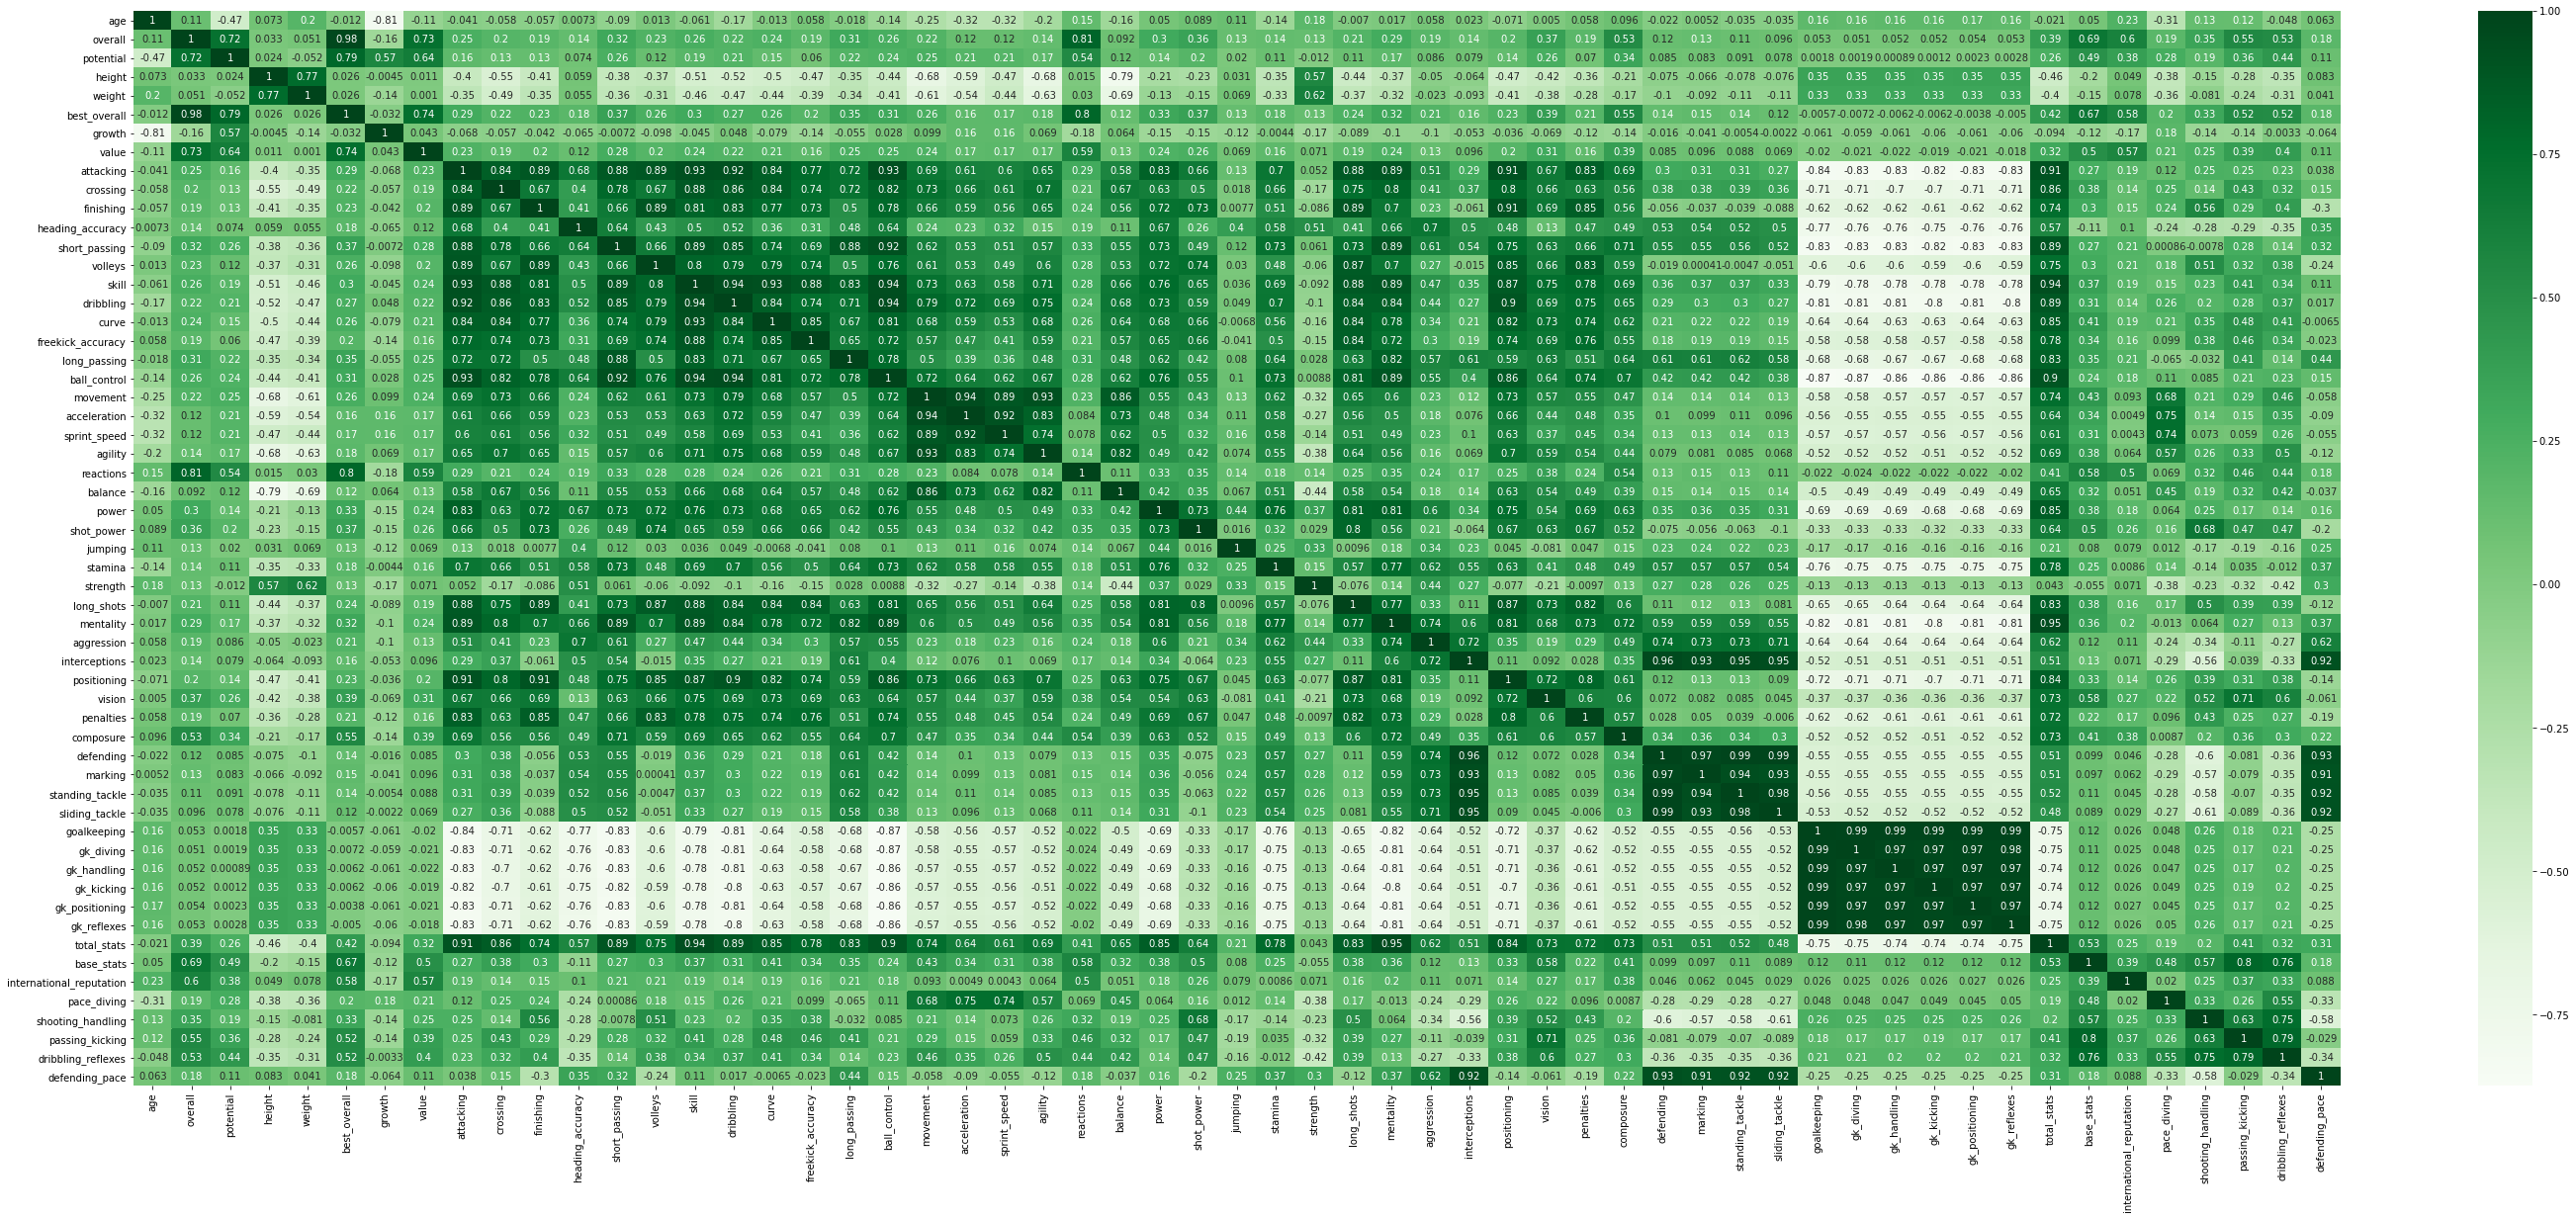

In [29]:
corr=result[['age',
 'overall',
 'potential',
 'height',
 'weight',
 'best_overall',
 'growth',
 'value',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'freekick_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'international_reputation',
 'pace_diving',
 'shooting_handling',
 'passing_kicking',
 'dribbling_reflexes',
 'defending_pace']]
plt.figure(figsize=(50,20))
corr=corr.corr()
sns.heatmap(corr,cmap="Greens",annot=True)

<AxesSubplot:>

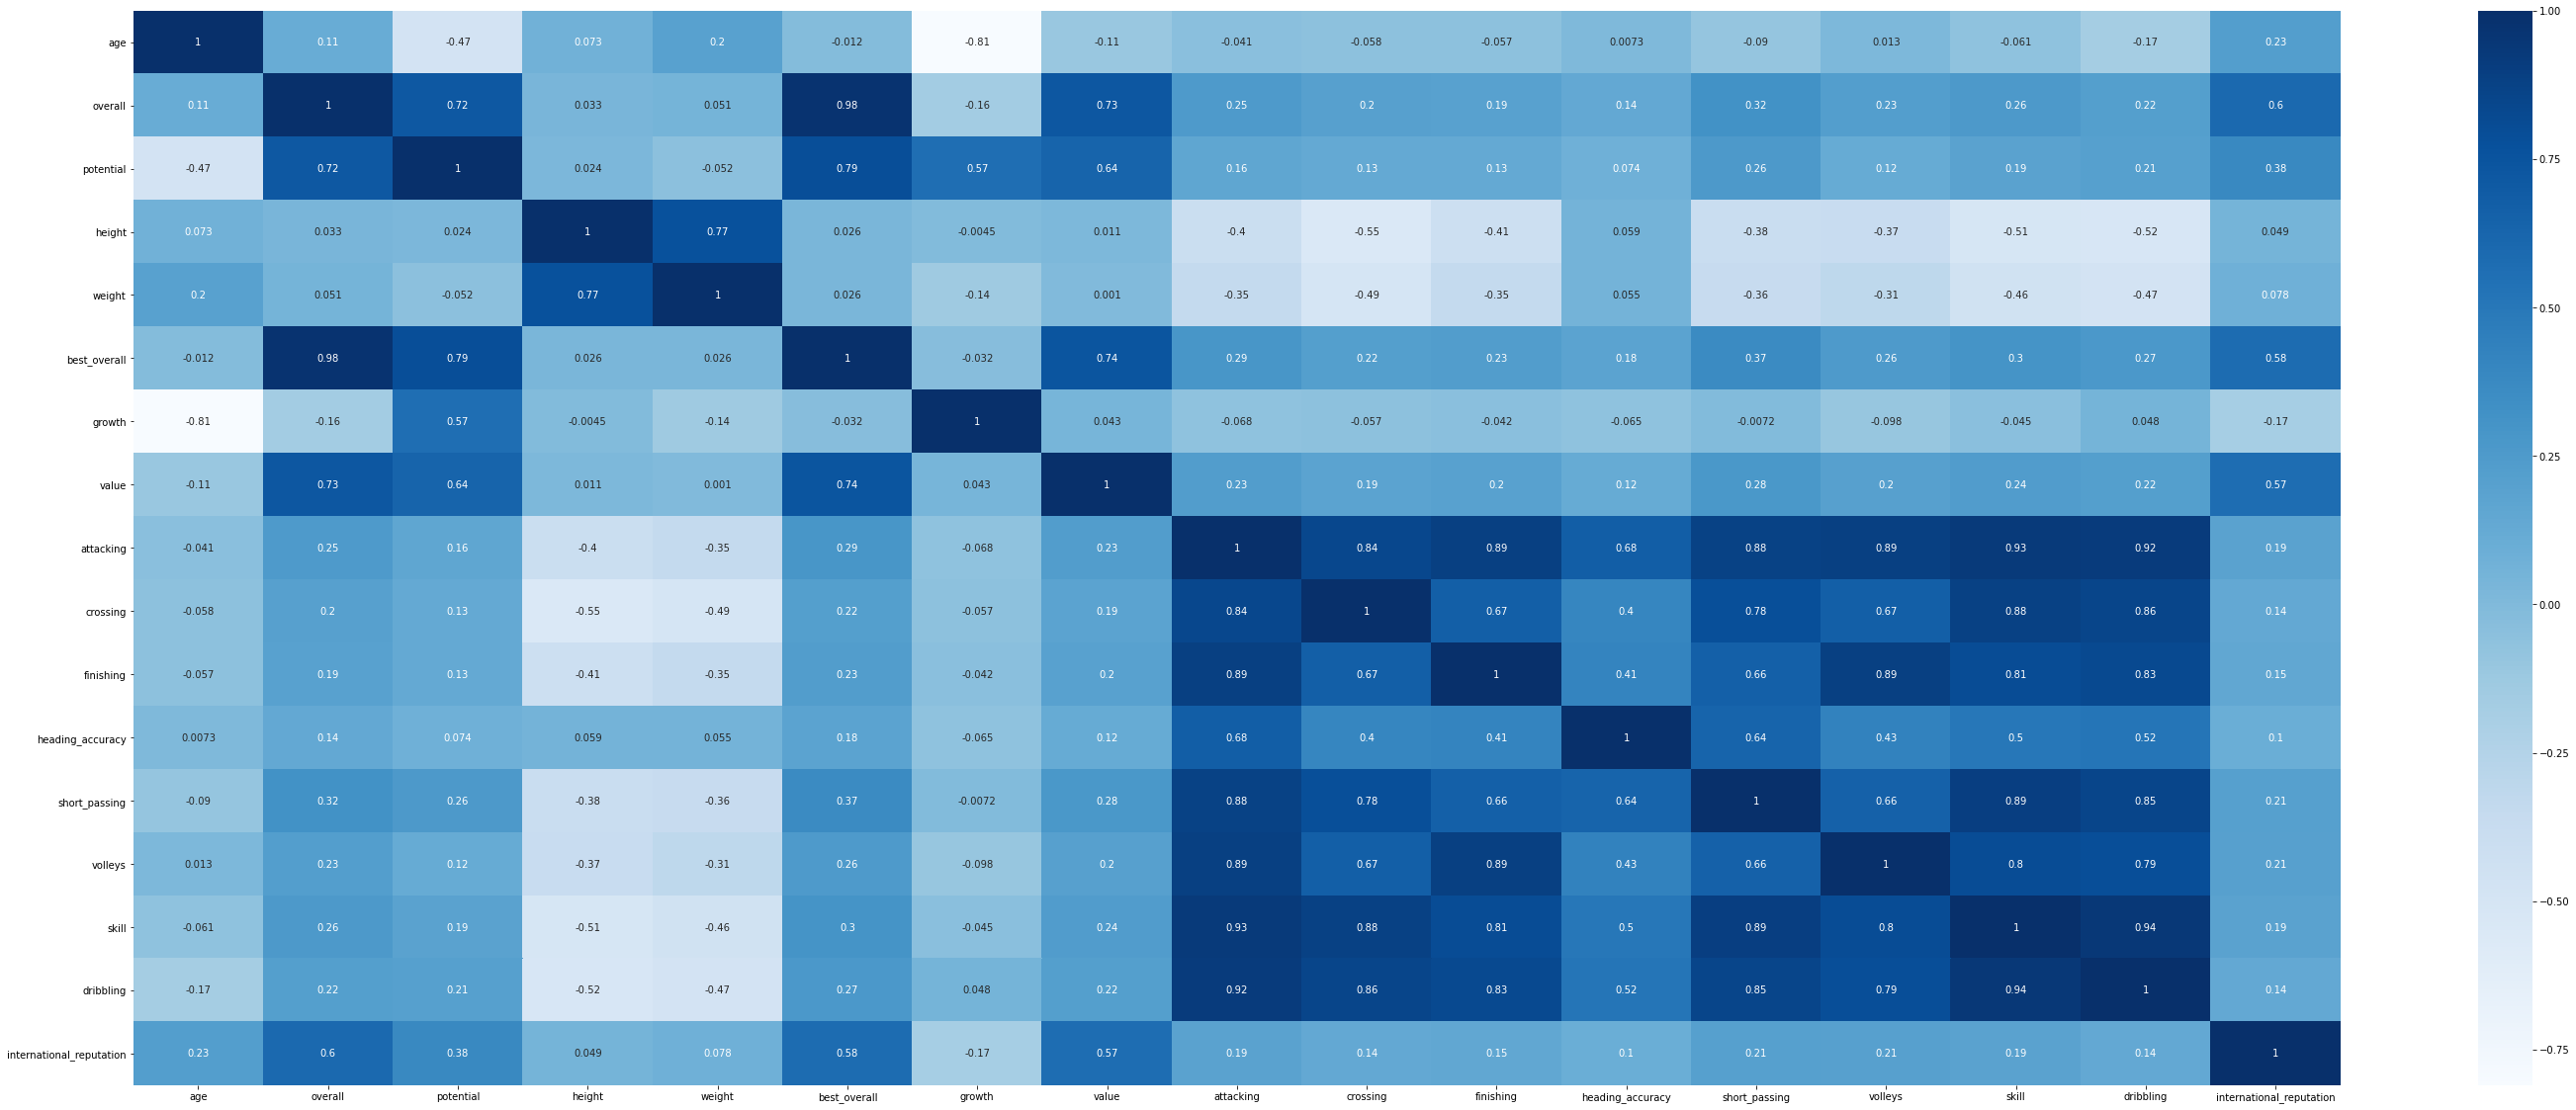

In [30]:
corr=result[['age',
 'overall',
 'potential',
 'height',
 'weight',
 'best_overall',
 'growth',
 'value',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'international_reputation'
 ]]
plt.figure(figsize=(50,20))
corr=corr.corr()
sns.heatmap(corr,cmap="Blues",annot=True)

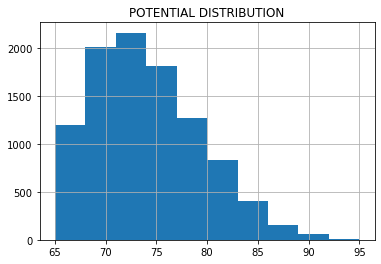

In [31]:
statistical_data["potential"].hist().set_title("POTENTIAL DISTRIBUTION")
plt.show()

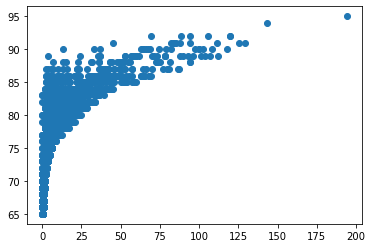

In [32]:
plt.scatter(statistical_data["value"], statistical_data["potential"])
plt.show()

In [33]:
result.describe()

,age,overall,potential,height,weight,best_overall,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,freekick_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,physical_positioning
count,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000,9901.000000
mean,26.536612,70.861428,73.616806,181.441572,75.755075,71.640137,2.755378,4.902518,274.503585,55.025048,51.005151,56.486921,64.502575,47.483891,285.615695,61.129886,53.256439,48.048379,58.978083,64.202909,333.538733,66.986870,67.201192,66.511362,67.364610,65.474700,320.577416,63.514695,67.585395,67.950813,68.682860,52.843652,280.395617,61.106656,51.889304,55.761135,59.433997,52.204525,64.608928,154.130290,51.675588,52.537521,49.917180,80.015251,16.101101,15.902232,15.772245,16.009191,16.230482,1728.776588,382.928997,1.172003,69.902333,58.508534,63.055651,67.725280,54.732653,69.004545
std,4.238186,4.360149,5.233074,6.918074,7.116300,4.397575,3.664318,10.127508,72.094008,18.032725,19.626962,17.319358,13.084640,18.298222,76.126028,18.034185,18.652516,18.065565,13.859702,15.385358,53.655038,14.574678,14.296744,14.394752,6.368307,14.390748,45.405744,12.054754,12.025970,14.940464,11.637045,19.382086,61.247769,16.571819,20.884591,19.555686,13.052737,15.907392,9.917008,62.691744,20.463626,21.733183,21.563531,87.215591,17.996666,17.258654,16.844588,17.700009,18.413044,239.800669,30.895371,0.490112,11.222257,13.393141,8.440872,8.305716,16.456301,8.129152
min,16.000000,65.000000,65.000000,156.000000,54.000000,65.000000,0.000000,0.000000,43.000000,6.000000,2.000000,5.000000,11.000000,4.000000,43.000000,4.000000,6.000000,4.000000,9.000000,8.000000,139.000000,15.000000,15.000000,19.000000,40.000000,15.000000,142.000000,20.000000,27.000000,13.000000,22.000000,4.000000,71.000000,11.000000,6.000000,3.000000,10.000000,8.000000,12.000000,26.000000,5.000000,7.000000,6.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,888.000000,284.000000,1.000000,30.000000,18.000000,33.000000,35.000000,15.000000,34.000000
25%,23.000000,67.000000,69.000000,176.000000,71.000000,68.000000,0.000000,1.200000,254.000000,46.000000,37.000000,49.000000,62.000000,34.000000,260.000000,58.000000,41.000000,35.000000,53.000000,63.000000,305.000000,59.000000,60.000000,59.000000,63.000000,57.000000,298.000000,55.000000,60.000000,64.000000,62.000000,40.000000,262.000000,53.000000,32.000000,47.000000,52.000000,42.000000,60.000000,95.000000,34.000000,32.000000,29.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1643.000000,363.000000,1.000000,65.000000,50.000000,58.000000,64.000000,40.000000,64.000000
50%,26.000000,70.000000,73.000000,182.000000,75.000000,71.000000,1.000000,1.900000,292.000000,61.000000,56.000000,60.000000,67.000000,50.000000,303.000000,67.000000,58.000000,49.000000,62.000000,68.000000,344.000000,69.000000,69.000000,69.000000,67.000000,68.000000,328.000000,66.000000,69.000000,71.000000,70.000000,59.000000,29

In [34]:
ttest,pval=stats.ttest_ind(result[result["foot"]=="Right"]["value"],
                           result[result["foot"]=="Left"]["value"])
if pval<0.05:
    print("H0'ı reddebiliriz.")
else :
    print("H0'ı reddedemeyiz.")
print("p value: ",pval)

H0'ı reddedemeyiz.
p value:  0.38716025585882197


In [35]:
ttest,pval=stats.ttest_ind(result[result["best_position"]=="ST"]["value"],
                           result[result["best_position"]=="CAM"]["value"])
if pval<0.05:
    print("H0'ı reddebiliriz.")
else :
    print("H0'ı reddedemeyiz.")
print("p value: ",pval)

H0'ı reddebiliriz.
p value:  0.0005853670703830149


In [36]:
fvalue,pvalue =stats.f_oneway(result[result["best_position"]=="ST"]["value"],
                     result[result["best_position"]=="CAM"]["value"])

if pvalue<0.05:
    print("H0'ı reddebiliriz.")
else :
    print("H0'ı reddedemeyiz.")
print("F-VALUE: ",fvalue,"  P-VALUE: ",pvalue)

H0'ı reddebiliriz.
F-VALUE:  11.852461561650573   P-VALUE:  0.0005853670703838166


In [37]:
ttest,pval=stats.ttest_ind(result[result["best_position"]=="ST"]["value"],
                           result[result["best_position"]=="GK"]["value"])
if pval<0.05:
    print("H0'ı reddebiliriz.")
else :
    print("H0'ı reddedemeyiz.")
print("p value: ",pval)

H0'ı reddebiliriz.
p value:  0.012716917587155959


In [38]:
fvalue,pvalue =stats.f_oneway(result[result["best_position"]=="ST"]["value"],
                     result[result["best_position"]=="GK"]["value"])

if pvalue<0.05:
    print("H0'ı reddebiliriz.")
else :
    print("H0'ı reddedemeyiz.")
print("F-VALUE: ",fvalue,"  P-VALUE: ",pvalue)

H0'ı reddebiliriz.
F-VALUE:  6.218110845781912   P-VALUE:  0.012716917587165989


In [39]:
fvalue,pvalue =stats.f_oneway(result[result["best_position"]=="ST"]["value"],
                     result[result["best_position"]=="CB"]["value"])

if pvalue<0.05:
    print("H0'ı reddebiliriz.")
else :
    print("H0'ı reddedemeyiz.")
print("F-VALUE: ",fvalue,"  P-VALUE: ",pvalue)

H0'ı reddebiliriz.
F-VALUE:  5.036534361645624   P-VALUE:  0.024884683554847253


In [40]:
fvalue,pvalue =stats.f_oneway(result[result["best_position"]=="ST"]["value"],
                     result[result["best_position"]=="CM"]["value"])

if pvalue<0.05:
    print("H0'ı reddebiliriz.")
else :
    print("H0'ı reddedemeyiz.")
print("F-VALUE: ",fvalue,"  P-VALUE: ",pvalue)

H0'ı reddebiliriz.
F-VALUE:  17.581179944787657   P-VALUE:  2.8739625794964226e-05


<AxesSubplot:ylabel='name'>

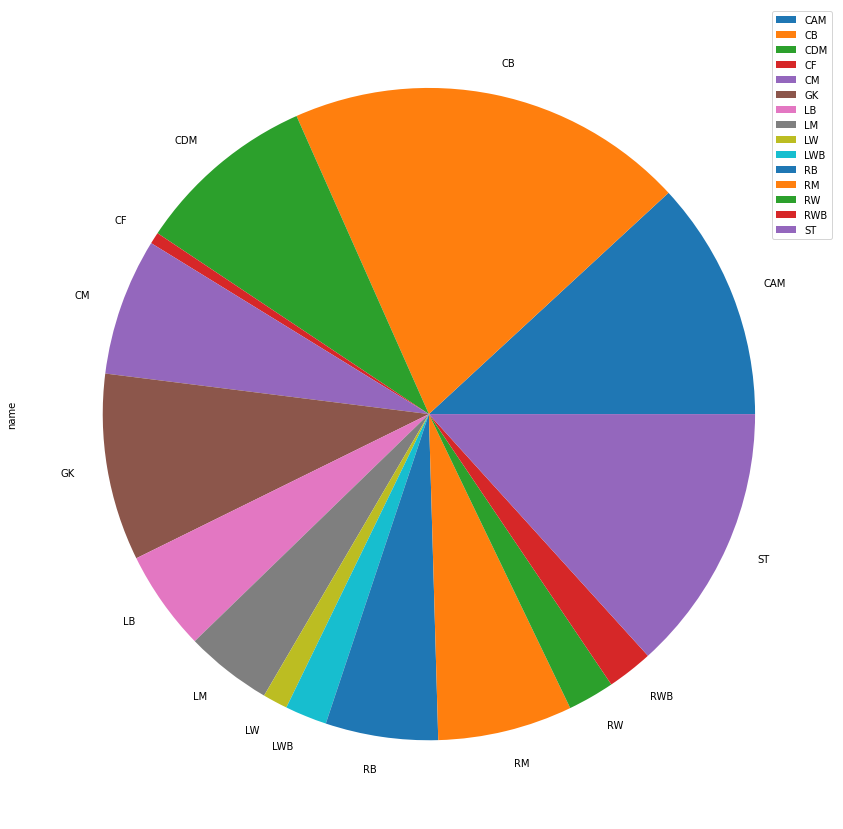

In [41]:
result.groupby(['best_position']).count().plot(kind='pie', y='name',figsize=(15,15))

In [42]:
X = np.array(result["potential"]).reshape(-1, 1)
y = np.array(result["value"])
reg = LinearRegression()
reg.fit(X,y)

print(f"potential = {reg.intercept_} + {reg.coef_[0]} * value")

potential = -86.09287113341625 + 1.236068141658372 * value


In [44]:
X = statistical_data.drop(["value"], axis = 1)
y = statistical_data[["value"]]

lr = LinearRegression()
lr.fit(X, y)
predictresult = lr.predict(X)

In [45]:
ols = sm.OLS(predictresult, X)
print(ols.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              7093.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):                        0.00
Time:                        14:14:37   Log-Likelihood:                         -18642.
No. Observations:                9901   AIC:                                  3.738e+04
Df Residuals:                    9854   BIC:                                  3.772e+04
Df Model:                          47                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [46]:
#prediction

In [47]:
X = statistical_data.drop(["value"], axis = 1)
y = statistical_data[["value"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 100)

xgb = XGBRegressor()

parametre = {"colsample_bytree":[0.3,0.5,0.7],
         "learning_rate":[0.01,0.05,0.09],
         "max_depth":[2,3,4,5,6],
         "n_estimators":[100,500,1000,3000]}

In [48]:
#grid = GridSearchCV(xgb, parametre, cv = 5, n_jobs = -1, verbose = 2)

In [49]:
#grid.fit(X_train, y_train)

In [50]:
#grid.best_parametre_

In [51]:
parametre2 = XGBRegressor(colsample_bytree = 0.5, 
                    learning_rate = 0.09,
                    max_depth = 4, 
                    n_estimators = 3000)

In [52]:
prediction_model = parametre2.fit(X_train, y_train)

In [53]:
prediction_model.predict(X_test)[1:20]

array([ 0.6956866 ,  1.0212121 , 30.380398  ,  2.8476324 ,  2.614851  ,
        0.8885324 ,  2.0128117 ,  1.9225824 ,  1.2717819 ,  1.2238979 ,
        1.1038234 ,  2.644078  ,  1.8804152 ,  0.80181473,  9.022657  ,
        1.377511  ,  1.3282377 , 10.447966  ,  2.0258007 ], dtype=float32)

In [54]:
y_test[1:20]

,value
9223,0.700
5843,1.000
122,35.500
3914,2.800
7212,2.700
8384,0.925
4140,2.000
6392,1.800
8804,1.300
6812,1.200


In [55]:
prediction_model.score(X_test, y_test)

0.9788079051303158

In [56]:
prediction_model.score(X_train, y_train)

0.9999955018590065

In [57]:
np.sqrt(-1*(cross_val_score(prediction_model, X_test, y_test, cv=10, scoring='neg_mean_squared_error'))).mean()

2.2636885590649287

In [58]:
X = statistical_data[["age","overall","potential","height","growth","reactions","international_reputation"]]
y = statistical_data[["value"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 100)

xgb = XGBRegressor()

parametre = {"colsample_bytree":[0.3,0.5,0.7],
         "learning_rate":[0.01,0.05,0.09],
         "max_depth":[2,3,4,5,6],
         "n_estimators":[100,500,1000,3000]}


In [59]:
grid = GridSearchCV(xgb, parametre, cv = 5, n_jobs = -1, verbose = 2)

In [60]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [61]:
grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 1000}

In [62]:
parametre2 = XGBRegressor(colsample_bytree = 0.7, 
                    learning_rate = 0.05,
                    max_depth = 3, 
                    n_estimators = 1000)

In [63]:
prediction_model = parametre2.fit(X_train, y_train)

In [64]:
prediction_model.predict(X_test)[1:20]

array([ 0.6647903 ,  0.9634953 , 32.545177  ,  3.1626062 ,  2.6812692 ,
        1.0213083 ,  1.9966984 ,  1.6211054 ,  1.238457  ,  1.2770289 ,
        1.3461255 ,  2.7552001 ,  2.2909188 ,  0.81881833,  9.908897  ,
        1.3660798 ,  1.0818573 ,  9.858721  ,  2.2329557 ], dtype=float32)

In [65]:
y_test[1:20]

,value
9223,0.700
5843,1.000
122,35.500
3914,2.800
7212,2.700
8384,0.925
4140,2.000
6392,1.800
8804,1.300
6812,1.200


In [66]:
res=pd.DataFrame(prediction_model.predict(X_test))

In [67]:
res

,0
0,2.150711
1,0.664790
2,0.963495
3,32.545177
4,3.162606
...,...
1976,20.641132
1977,1.670390
1978,1.355993
1979,1.863774


In [68]:
y_test

,value
2903,2.0
9223,0.7
5843,1.0
122,35.5
3914,2.8
...,...
185,19.0
4979,1.7
3245,1.2
3244,1.7


In [69]:
y_test=y_test.reset_index(drop=True)

In [70]:
son_tablo=pd.concat([res,y_test],axis=1)

In [71]:
son_tablo

,0,value
0,2.150711,2.0
1,0.664790,0.7
2,0.963495,1.0
3,32.545177,35.5
4,3.162606,2.8
...,...,...
1976,20.641132,19.0
1977,1.670390,1.7
1978,1.355993,1.2
1979,1.863774,1.7


In [72]:
son_tablo=son_tablo.set_axis(['predicted',
 'real'],axis="columns",inplace=False)

<ipython-input-72-3b41801b59f4>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  son_tablo=son_tablo.set_axis(['predicted',


In [73]:
son_tablo

,predicted,real
0,2.150711,2.0
1,0.664790,0.7
2,0.963495,1.0
3,32.545177,35.5
4,3.162606,2.8
...,...,...
1976,20.641132,19.0
1977,1.670390,1.7
1978,1.355993,1.2
1979,1.863774,1.7


In [110]:
son_tablo["difference"]=son_tablo["predicted"]-son_tablo["real"]

In [111]:
son_tablo

,predicted,real,difference
0,2.150711,2.0,0.150711
1,0.664790,0.7,-0.035210
2,0.963495,1.0,-0.036505
3,32.545177,35.5,-2.954823
4,3.162606,2.8,0.362606
...,...,...,...
1976,20.641132,19.0,1.641132
1977,1.670390,1.7,-0.029610
1978,1.355993,1.2,0.155993
1979,1.863774,1.7,0.163774


In [112]:
son_tablo["difference"].mean()

-0.015624888007806922

In [113]:
son_tablo["difference"].std()

0.9096975692572413

In [74]:
print("TEST SCORE: ", prediction_model.score(X_test, y_test))

TEST SCORE:  0.9926224454300299


In [75]:
print("TRAIN SCORE: ",prediction_model.score(X_train, y_train))

TRAIN SCORE:  0.9955605443657698


In [138]:
print("TEST SCORE: ", prediction_model.score(X_test, y_test))
print("TRAIN SCORE: ",prediction_model.score(X_train, y_train))
print('Mean Absolute Error:', mean_absolute_error(y_test, res))  
print('Mean Squared Error:', mean_squared_error(y_test, res))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, res)))
print("R^2: ",r2_score(y_test, res))

TEST SCORE:  0.9926224454300299
TRAIN SCORE:  0.9955605443657698
Mean Absolute Error: 0.3598646954799438
Mean Squared Error: 0.8273760612417723
Root Mean Squared Error: 0.9096021444795369
R^2:  0.9926224454300299


In [ ]:
q=res.head(20)

In [ ]:
r=y_test.head(20)

In [116]:
z=son_tablo.head(20)

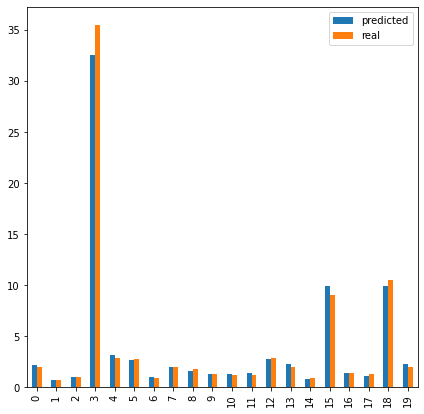

In [120]:
z[["predicted","real"]].plot(kind='bar',figsize=(7,7))
plt.show()


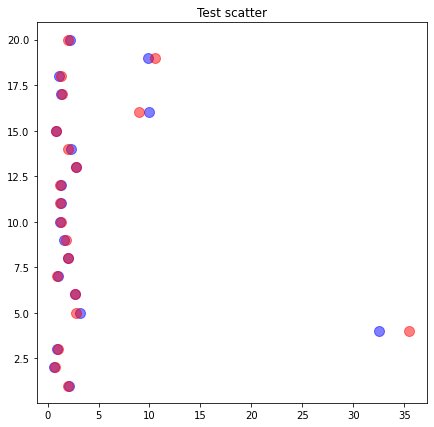

In [126]:
tr=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, title="Test scatter")
ax.scatter(q,tr, s=100, color="blue", alpha=0.5)
ax.scatter(r,tr, s=100, color="red", alpha=0.5)